In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
data = pd.read_csv('../input/walmart-dataset/Walmart.csv')
df = data.copy()        

/kaggle/input/walmart-dataset/Walmart.csv


**Features**
* Store - the store number
* Date - the week of sales
* Weekly_Sales - sales for the given store
* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
* Temperature - Temperature on the day of sale
* Fuel_Price - Cost of fuel in the region
* CPI – Prevailing consumer price index
* Unemployment - Prevailing unemployment rate
* Holiday Events\
 * Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
 * Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\ 
 * Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
 * Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13





In [2]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date',axis=1,inplace=True)

In [6]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3


In [7]:
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
dtype: int64

In [8]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,23.00,12.99,1.00,12.00,23.00,34.00,45.00
Weekly_Sales,6435.0,1046964.88,564366.62,209986.25,553350.10,960746.04,1420158.66,3818686.45
Holiday_Flag,6435.0,0.07,0.26,0.00,0.00,0.00,0.00,1.00
Temperature,6435.0,60.66,18.44,-2.06,47.46,62.67,74.94,100.14
Fuel_Price,6435.0,3.36,0.46,2.47,2.93,3.44,3.74,4.47
CPI,6435.0,171.58,39.36,126.06,131.74,182.62,212.74,227.23
Unemployment,6435.0,8.00,1.88,3.88,6.89,7.87,8.62,14.31
Year,6435.0,2010.97,0.80,2010.00,2010.00,2011.00,2012.00,2012.00
Month,6435.0,6.48,3.32,1.00,4.00,6.00,9.00,12.00
Day,6435.0,15.65,8.75,1.00,8.00,16.00,23.00,31.00


In [9]:
df['Holiday_Flag'].unique()

array([0, 1])

In [10]:
df['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

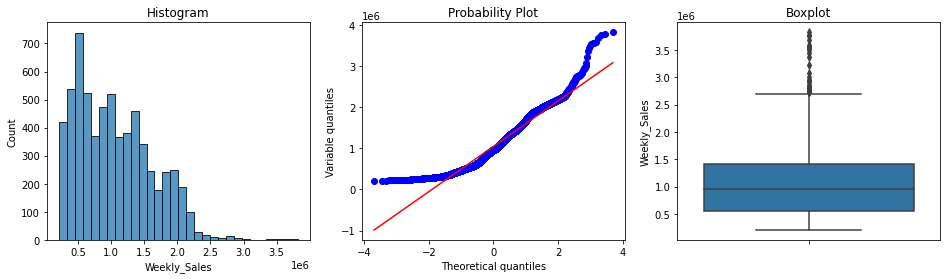

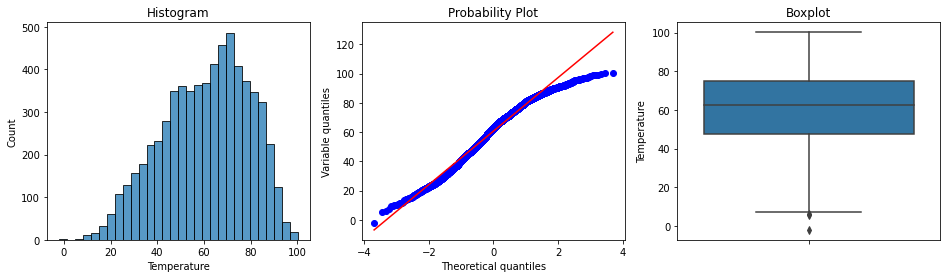

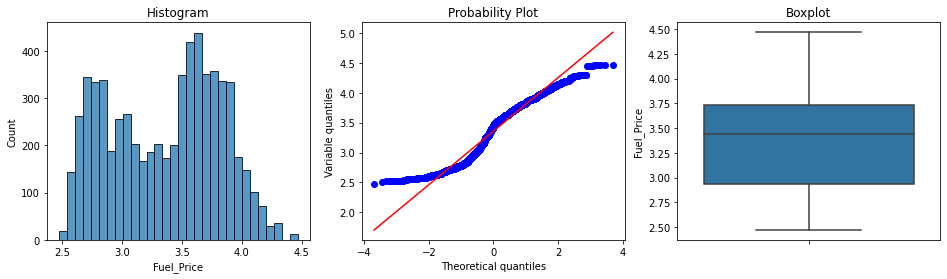

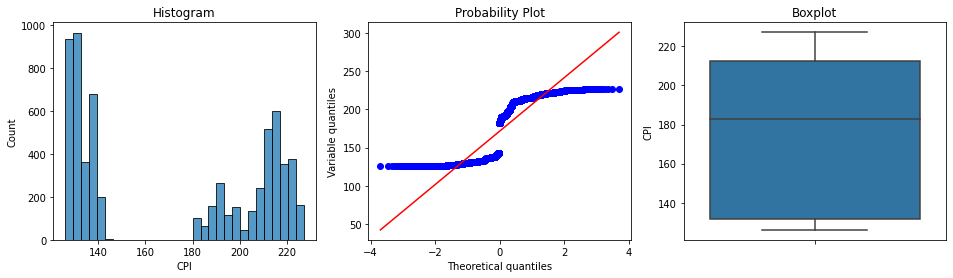

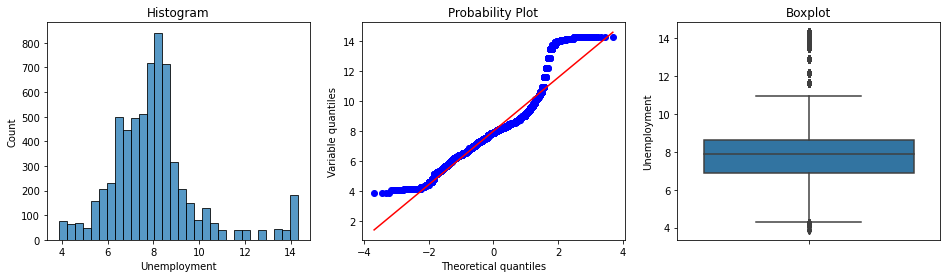

In [11]:
for col in df.columns:
    if df[col].dtype !="O" and df[col].dtype !="int64":
        plt.figure(figsize=(16,4))
        
        plt.subplot(1,3,1)
        sns.histplot(data=df[col],bins=30)
        plt.title("Histogram")
        
        plt.subplot(1,3,2)
        stats.probplot(df[col], dist="norm", plot=plt)
        plt.ylabel('Variable quantiles')
        
        plt.subplot(1,3,3)
        sns.boxplot(y=df[col])
        plt.title("Boxplot")
        plt.show()

<AxesSubplot:xlabel='variable', ylabel='value'>

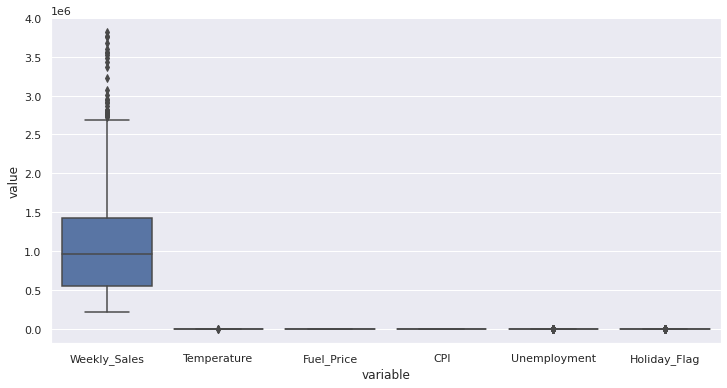

In [12]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.boxplot(data=df.melt(value_vars=['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','Holiday_Flag']),
           x='variable',y='value')

**Outlier Engineering**

**Capping IQR proximity rule**

In [13]:
def skewed_boundaries(df, variable):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [14]:
ws_upper_limit,ws_lower_limit = skewed_boundaries(df,'Weekly_Sales')
ws_upper_limit,ws_lower_limit

(2720371.4924999997, -746862.7275)

In [15]:
df['Weekly_Sales']= np.where(df['Weekly_Sales'] > ws_upper_limit, ws_upper_limit,
                       np.where(df['Weekly_Sales'] < ws_lower_limit, ws_lower_limit, df['Weekly_Sales']))

In [16]:
un_upper_limit, un_lower_limit = skewed_boundaries(df,'Unemployment')
un_upper_limit, un_lower_limit

(11.218499999999999, 4.2945)

In [17]:
df['Unemployment']= np.where(df['Unemployment'] > un_upper_limit, un_upper_limit,
                       np.where(df['Unemployment'] < un_lower_limit, un_lower_limit, df['Unemployment']))

<AxesSubplot:xlabel='variable', ylabel='value'>

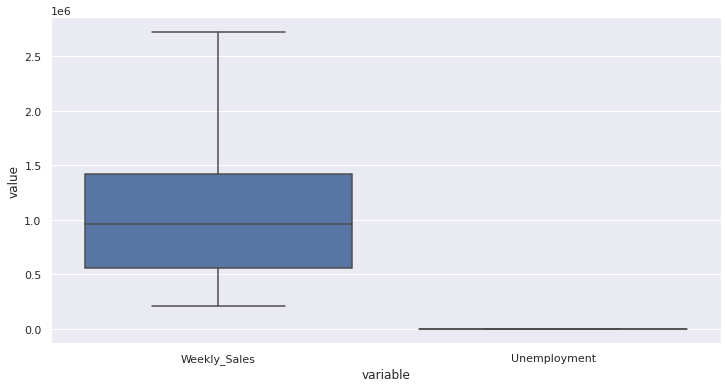

In [18]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.boxplot(data=df.melt(value_vars=['Weekly_Sales','Unemployment']),
           x='variable',y='value')

<AxesSubplot:>

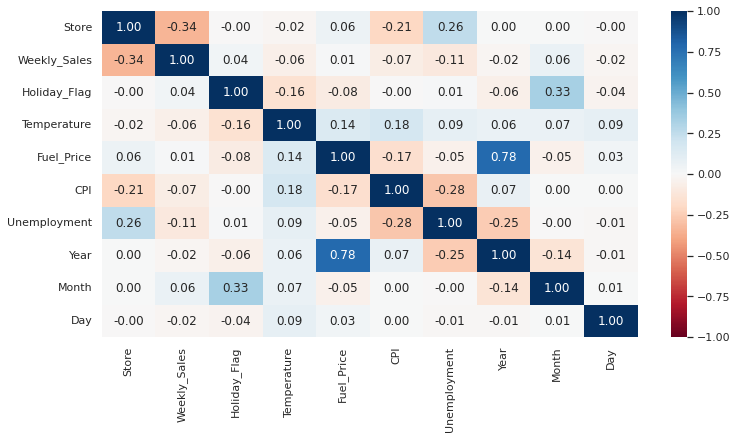

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
corr=df.corr()
sns.heatmap(corr, annot=True, cmap="RdBu",vmin=-1,vmax=1,fmt=".2f")

**Which months have the highest weekly sales?**

Text(0.5, 1.0, 'Average Weekly Sales by Month for Three Years')

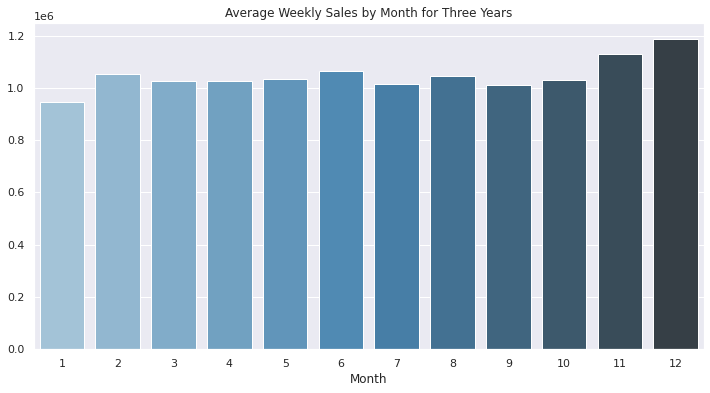

In [20]:
result = df.groupby('Month')['Weekly_Sales'].mean()
sns.set(rc = {'figure.figsize':(12,6)})
sns.barplot(x = result.index, y = result.values,palette='Blues_d').set_title('Average Weekly Sales by Month for Three Years')

**How are sales during holiday weeks compared to non-holiday weeks?**

In [21]:
df['Holiday_Flag']=df['Holiday_Flag'].map({1:'Special Holiday',0:'Non-Holiday'})

Text(0.5, 1.0, 'Weekly Sales by Special Holiday')

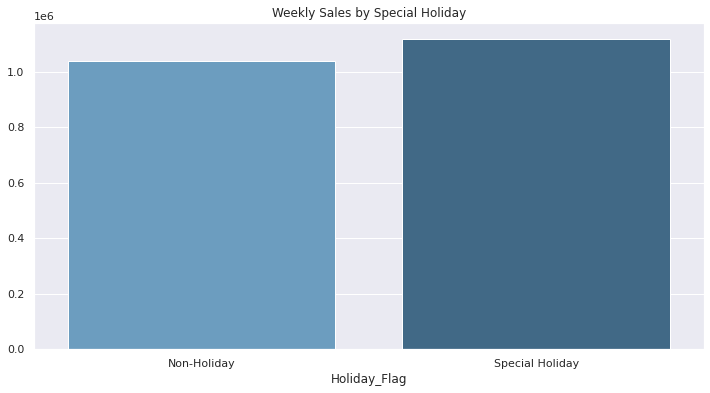

In [22]:
result1=df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
sns.set(rc = {'figure.figsize':(12,6)})
sns.barplot(x = result1.index, y = result1.values,palette='Blues_d').set_title('Weekly Sales by Special Holiday')

**How are the average weekly sales by years?**

Text(0.5, 1.0, 'Average Weekly Sales by Year')

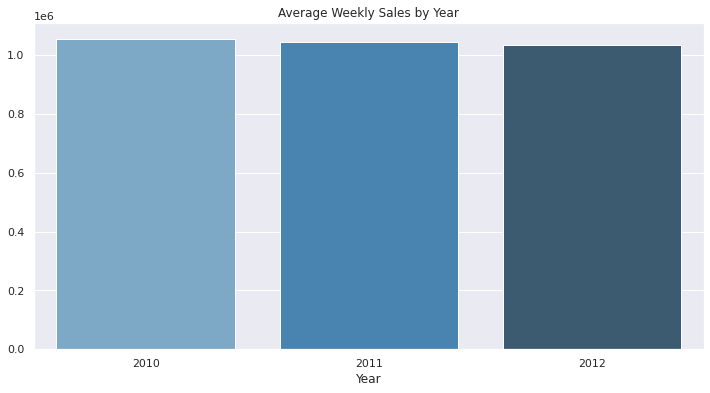

In [23]:
result2 = df.groupby('Year')['Weekly_Sales'].mean()
sns.barplot(x = result2.index, y = result2.values,palette="Blues_d").set_title('Average Weekly Sales by Year')

**Which store had the highest weekly sales in 2010?**

In [24]:
df2010 = df[df.Year==2010]
df2010[df2010.Weekly_Sales == df2010.Weekly_Sales.max()]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
189,2,2.720371e+06,Non-Holiday,49.97,2.886,211.064660,8.163,2010,12,24
471,4,2.720371e+06,Special Holiday,48.08,2.752,126.669267,7.127,2010,11,26
474,4,2.720371e+06,Non-Holiday,46.57,2.884,126.879484,7.127,2010,12,17
475,4,2.720371e+06,Non-Holiday,43.21,2.887,126.983581,7.127,2010,12,24
761,6,2.720371e+06,Non-Holiday,55.07,2.886,212.916508,7.007,2010,12,24
1329,10,2.720371e+06,Special Holiday,55.33,3.162,126.669267,9.003,2010,11,26
1332,10,2.720371e+06,Non-Holiday,59.15,3.125,126.879484,9.003,2010,12,17
1333,10,2.720371e+06,Non-Holiday,57.06,3.236,126.983581,9.003,2010,12,24
1758,13,2.720371e+06,Special Holiday,28.22,2.830,126.669267,7.795,2010,11,26
1761,13,2.720371e+06,Non-Holiday,35.21,2.842,126.879484,7.795,2010,12,17


**Which store had the highest weekly sales in 2011?**

In [25]:
df2011 = df[df.Year==2011]
df2011[df2011.Weekly_Sales == df2011.Weekly_Sales.max()]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
241,2,2.720371e+06,Non-Holiday,46.66,3.112,218.999550,7.441,2011,12,23
523,4,2.720371e+06,Special Holiday,47.96,3.225,129.836400,5.143,2011,11,25
526,4,2.720371e+06,Non-Holiday,36.44,3.149,129.898065,5.143,2011,12,16
527,4,2.720371e+06,Non-Holiday,35.92,3.103,129.984548,5.143,2011,12,23
1381,10,2.720371e+06,Special Holiday,60.68,3.760,129.836400,7.874,2011,11,25
1385,10,2.720371e+06,Non-Holiday,48.36,3.541,129.984548,7.874,2011,12,23
1810,13,2.720371e+06,Special Holiday,38.89,3.445,129.836400,6.392,2011,11,25
1813,13,2.720371e+06,Non-Holiday,27.85,3.282,129.898065,6.392,2011,12,16
1814,13,2.720371e+06,Non-Holiday,24.76,3.186,129.984548,6.392,2011,12,23
1957,14,2.720371e+06,Non-Holiday,42.27,3.389,188.929975,8.523,2011,12,23


**Which store had the highest weekly sales in 2012?**

In [26]:
df2012 = df[df.Year==2012]
df2012[df2012.Weekly_Sales == df2012.Weekly_Sales.max()]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
2830,20,2565259.92,Non-Holiday,50.06,3.996,214.238705,7.139,2012,6,4


**Which store had the lowest weekly sales in 2010?**

In [27]:
df2010[df2010.Weekly_Sales == df2010.Weekly_Sales.min()]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
4619,33,209986.25,Non-Holiday,52.82,3.041,126.731333,9.265,2010,3,12


**Which store had the lowest weekly sales in 2011?**

In [28]:
df2011[df2011.Weekly_Sales == df2011.Weekly_Sales.min()]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
4675,33,215359.21,Special Holiday,51.6,3.428,130.071032,8.01,2011,12,30


**Which store had the lowest weekly sales in 2012?**

In [29]:
df2012[df2012.Weekly_Sales == df2012.Weekly_Sales.min()]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
4679,33,236920.49,Non-Holiday,56.33,3.675,130.314452,7.603,2012,1,27


**Weekly Sales by Year**

Text(0.5, 1.0, 'Weekly Sales by 2010')

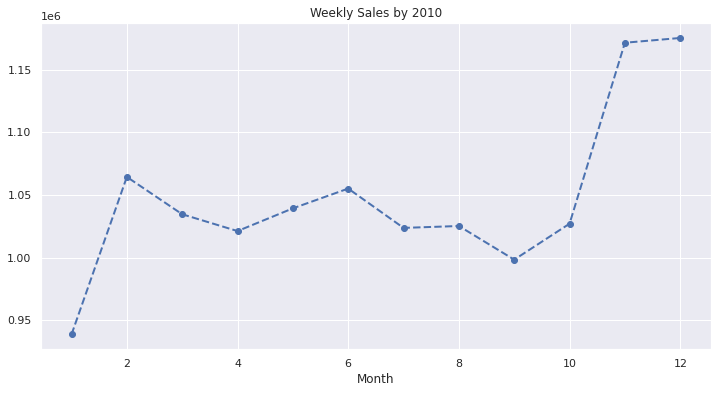

In [30]:
df2010.groupby('Month')["Weekly_Sales"].mean().plot(linewidth=2,style='--o').set_title('Weekly Sales by 2010')

Text(0.5, 1.0, 'Weekly Sales by 2011')

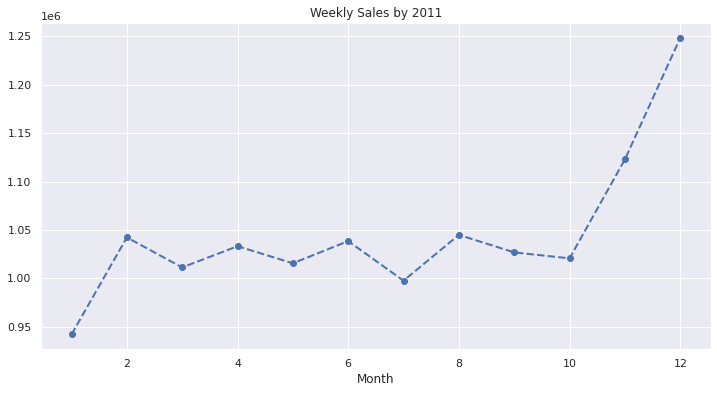

In [31]:
df2011.groupby('Month')['Weekly_Sales'].mean().plot(linewidth=2,style='--o').set_title('Weekly Sales by 2011')

Text(0.5, 1.0, 'Weekly Sales by 2012')

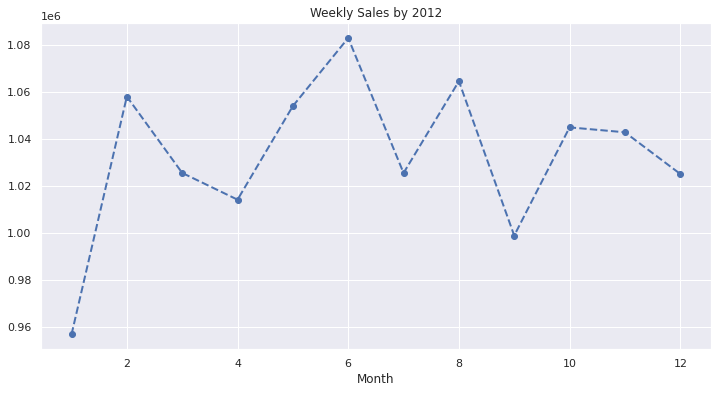

In [32]:
df2012.groupby('Month')['Weekly_Sales'].mean().plot(linewidth=2,style='--o').set_title('Weekly Sales by 2012')